In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

from ud_parser.ud_parser import UDScores
from language_utils.utils import *

%matplotlib notebook
plt.ion()

In [2]:
parser = UDScores(metric='las')
data = parser.get_data()
data = [datum for datum in data if datum.system != 'SParse (İstanbul)']

systems = set(datum.system for datum in data)
languages = set(datum.language for datum in data).difference({None})
treebanks = set(datum.tb_code for datum in data if datum.language)


def filter_data(mean=False, **kwargs):
    def filter_function(datum):
        return all(getattr(datum, key) == value for key, value in kwargs.items())
    filtered = filter(filter_function, data)
    if mean:
        return np.mean([datum.perf for datum in filtered])
    else:
        return filtered

I remove the `'SParse (İstanbul)'` submission since it seems to be completely broken (average LAS=1%)

# Comparing treebank size and performance

Germanic-Romance(Italic)-Slavic (GRS) languages are red, while all the other languages are blue. We can see the expected relation between treebank size and performance, although it is not very strong. There is a clear disparity between GRS and non-GRS languages as far as performance goes. We can also see that there are several left-behind blue languages. These have extremely small amounts of data and there is no treebank in the same language or in the very similar language to help them out. These are the languages we might want to focus on later. The worst results are for Thai.

In [3]:
fig = plt.figure()
for tb_code in treebanks:
    perf = filter_data(mean=True, tb_code=tb_code)
    c = {
        True: 'r',
        False: 'b'
    }[tb_code_belongs_to(tb_code, fam.grs)]
    plt.scatter(tb_sizes[tb_code], perf, c=c, s=3)
#     plt.annotate(tb_code,
#                  xy=(tb_sizes[tb_code], perf),
#                  xytext=(5, 2),
#                  textcoords='offset points',
#                  ha='right',
#                  va='bottom',
#                  fontsize='xx-small')
    plt.xlabel('Treebank size')
    plt.ylabel('Average performance')
fig.canvas.draw_idle()

<IPython.core.display.Javascript object>

AttributeError: 'Node' object has no attribute 'belongs_to'

<IPython.core.display.Javascript object>


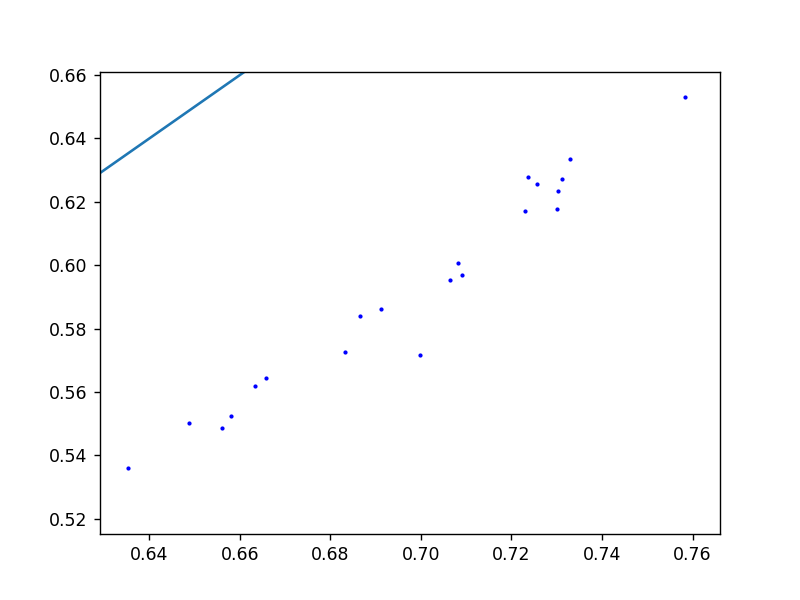

In [4]:
fig = plt.figure()
for system in systems:
    mean = filter_data(mean=True, system=system, aggregate=False) / 100
    system_data = list(filter_data(system=system, aggregate=False))
    high_mean = np.mean([
        datum.perf
        for datum
        in system_data
        if datum.language.belongs_to(fam.grs)
    ]) / 100
    low_mean = np.mean([
        datum.perf
        for datum
        in system_data
        if not datum.language.belongs_to(fam.grs)
    ]) / 100
    plt.scatter(mean, low_mean, c='b', s=2)

plt.plot([0.4, 0.8], [0.4, 0.8])
fig.canvas.draw_idle()
